<a href="https://colab.research.google.com/github/ChrysMan/Reinforcement-Learning-TUC-2024/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving stocks (1).csv to stocks (1).csv


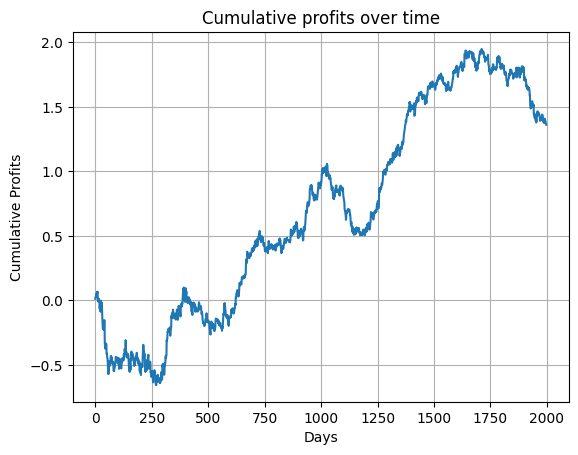

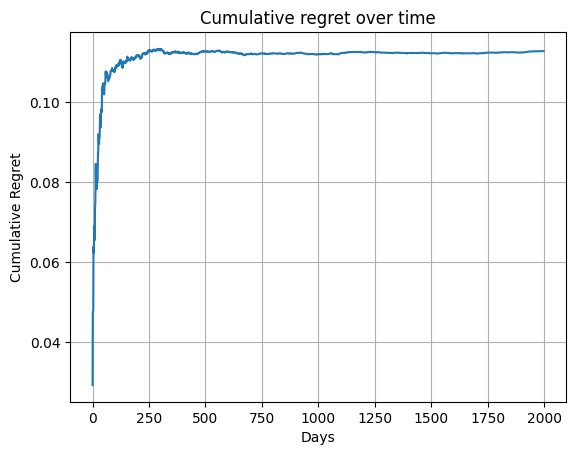

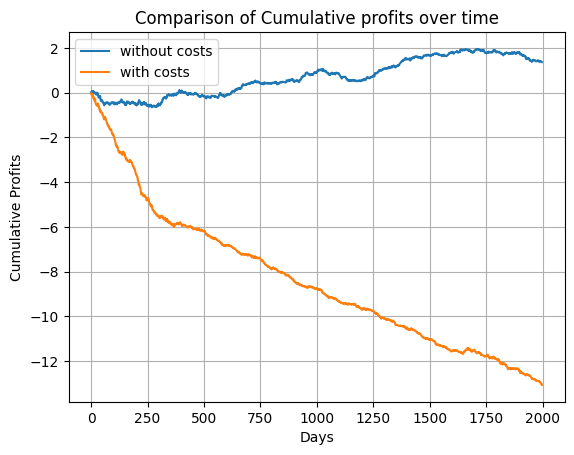

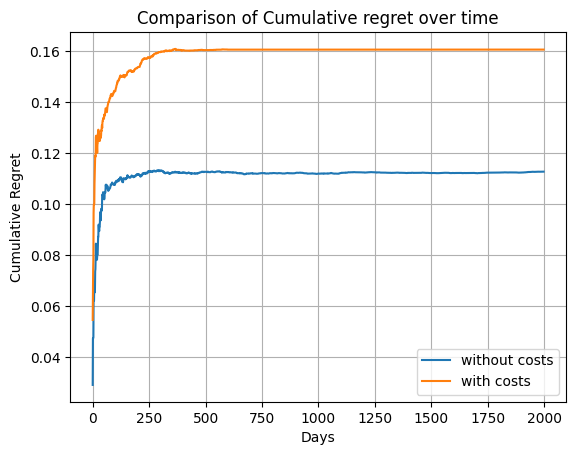

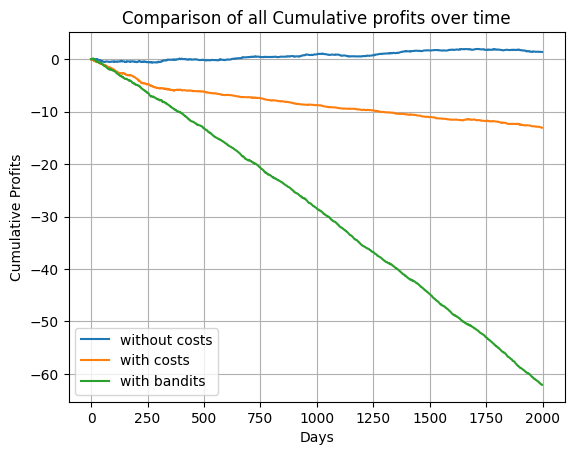

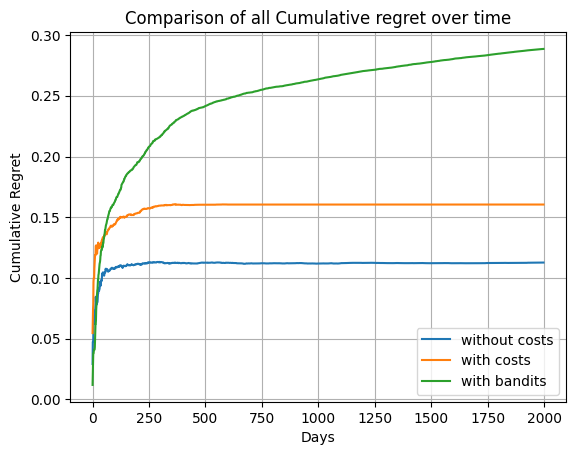

In [2]:
from os import WTERMSIG

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import random

data = pd.read_csv(io.BytesIO(uploaded['stocks (1).csv']))
K = len(data.columns)

weights_1 = np.ones(K)                        # Initialize equal weights for each stock for task 1
weights_2 = np.ones(K)                        # Initialize equal weights for each stock for task 2
weights_3 = np.ones(K)                        # Initialize equal weights for each stock for task 3
loss = np.zeros((K,))                         # Array of losses each day
sum_of_losses_1 = np.zeros((K,))              # Sum of losses for every expert for task 1
sum_of_losses_2 = np.zeros((K,))              # Sum of losses for every expert for task 2
sum_of_losses_3 = np.zeros((K,))              # Sum of losses for every expert for task 3

n = np.sqrt(np.log(K) / len(data))            # Calculate discount parameter
gamma = np.cbrt((K*np.log(K)) / len(data))    # Calculate the exploration and exploitation parameter

profits_without_costs = []
regret_without_costs = []
profits_with_costs = []
regret_with_costs = []
profits_with_bandits = []
regret_with_bandits = []



transaction_costs = np.arange(0.005, 0.005*(K+1), 0.005)

# Iterate over each day
for t in range (len(data)):
  stock_data = data.iloc[t]    # Rewards of each expert i

##############Task 1####################
  W_1 = np.sum(weights_1)   # Sum of weights in step t
  prob_1 = weights_1/W_1

  # Normalization of rewards between 0 and 1
  min_val = stock_data.min()
  max_val = stock_data.max()

  for j in range(K):
    loss[j] = 1 - ((stock_data[j]-min_val)/(max_val-min_val))
    sum_of_losses_1[j] += loss[j]

  # Choose stock to invest in based on weights
  chosen_stock = np.random.choice(np.arange(K), p=prob_1)

  # Update weights using Multiplicative Weights Algorithm
  weights_1 *= (1 - n)**loss

  # Calculate the profit for the chosen stock
  daily_profit = data.iloc[t, chosen_stock]

  profits_without_costs.append(daily_profit)

  # Calculate regret
  regret = (stock_data[np.argmin(sum_of_losses_1)] - stock_data[chosen_stock]) / (t+1)
  regret_without_costs.append(regret)


##############Task 2####################
  W_2 = np.sum(weights_2)   # Sum of weights in step t
  prob_2 = weights_2/W_2

  # Normalization of rewards between 0 and 1
  min_val = stock_data.min() - transaction_costs[np.argmin(stock_data)]
  max_val = stock_data.max() - transaction_costs[np.argmax(stock_data)]

  for j in range(K):
    loss[j] = 1 - (((stock_data[j] - transaction_costs[j])-min_val)/(max_val-min_val))
    sum_of_losses_2[j] += loss[j]

  # Choose stock to invest in based on weights
  chosen_stock = np.random.choice(np.arange(K), p=prob_2)

  # Update weights using Multiplicative Weights Algorithm
  weights_2 *= (1 - n)**loss

  # Calculate the loss for the chosen stock
  daily_profit = data.iloc[t, chosen_stock]

  # Calculate transaction cost for the chosen stock
  trans_cost = transaction_costs[chosen_stock]*1  # 1 euro investement

  # calculate net profit for the day
  net_profit = daily_profit - trans_cost

  # Store net profit for the day
  profits_with_costs.append(net_profit)

  # Calculate regret
  regret = ((stock_data[np.argmin(sum_of_losses_2)]-transaction_costs[np.argmin(sum_of_losses_2)]) - net_profit) / (t+1)
  regret_with_costs.append(regret)

##############Task 3####################
  prob_t_3 = weights_3/np.sum(weights_3)
  q_t = (1 - gamma) * prob_t_3 + gamma / K  # Define the exploration

  # Choose stock to invest in based on q_t
  chosen_stock_3 = np.random.choice(np.arange(K), p=q_t)

  # Calculate transaction cost for the chosen stock
  trans_cost = transaction_costs[chosen_stock_3]*1  # 1 euro investement

  # Calculate the profit for the chosen stock
  daily_profit = data.iloc[t, chosen_stock_3]

  # calculate net porfit for the day
  net_profit = daily_profit - trans_cost

  sum_of_losses_3[chosen_stock_3] += net_profit

  # Update weights using Multiplicative Weights Algorithm
  weights_3[chosen_stock_3] *= (1 - n)**(net_profit/(q_t[chosen_stock_3]))

  # Store net profit for the day
  profits_with_bandits.append(net_profit)

  # Calculate regret
  best_profit = stock_data.max() - transaction_costs[np.argmax(stock_data)]
  regret = (best_profit - net_profit)/ (t+1)
  regret_with_bandits.append(regret)


# Calculate cumulative profits and regret for Task 1
cumulative_profits_without_costs = np.cumsum(profits_without_costs)
cumulative_regret_without_costs = np.cumsum(regret_without_costs)

# Calculate cumulative profits and regret for Task 2
cumulative_profits_with_costs = np.cumsum(profits_with_costs)
cumulative_regret_with_costs = np.cumsum(regret_with_costs)

# Calculate cumulative profits and regret for Task 3
cumulative_profits_with_bandits = np.cumsum(profits_with_bandits)
cumulative_regret_with_bandits = np.cumsum(regret_with_bandits)


# Plot results
# Task 1
plt.plot(cumulative_profits_without_costs)
plt.title("Cumulative profits over time")
plt.xlabel('Days')
plt.ylabel('Cumulative Profits')
plt.grid(True)
plt.show()

plt.plot(cumulative_regret_without_costs)
plt.title("Cumulative regret over time")
plt.xlabel('Days')
plt.ylabel('Cumulative Regret')
plt.grid(True)
plt.show()

# Task 2
plt.plot(cumulative_profits_without_costs, label = 'without costs')
plt.plot(cumulative_profits_with_costs, label = 'with costs')
plt.title("Comparison of Cumulative profits over time")
plt.xlabel('Days')
plt.ylabel('Cumulative Profits')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(cumulative_regret_without_costs, label = 'without costs')
plt.plot(cumulative_regret_with_costs, label = 'with costs')
plt.title("Comparison of Cumulative regret over time")
plt.xlabel('Days')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.grid(True)
plt.show()

# Task 3
plt.plot(cumulative_profits_without_costs, label = 'without costs')
plt.plot(cumulative_profits_with_costs, label = 'with costs')
plt.plot(cumulative_profits_with_bandits, label = 'with bandits')
plt.title("Comparison of all Cumulative profits over time")
plt.xlabel('Days')
plt.ylabel('Cumulative Profits')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(cumulative_regret_without_costs, label = 'without costs')
plt.plot(cumulative_regret_with_costs, label = 'with costs')
plt.plot(cumulative_regret_with_bandits, label = 'with bandits')
plt.title("Comparison of all Cumulative regret over time")
plt.xlabel('Days')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.grid(True)
plt.show()


